<a href="https://colab.research.google.com/github/salimkt/Speech-Denoiser/blob/main/Spycatcher_denoise_grp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Libraries

In [1]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

# Denoising algorithm

In [2]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

# Voice Input

url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

#Display input

IPython.display.Audio(data=data, rate=rate)

# Audio Spectrum

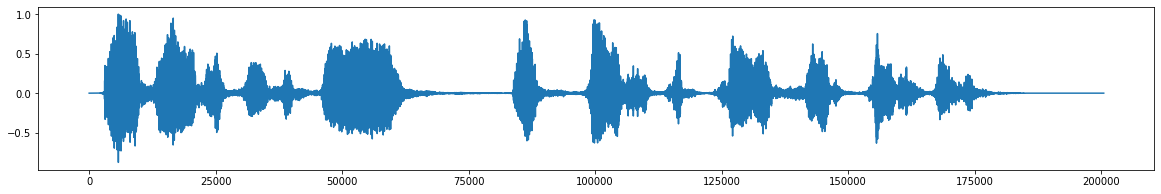

In [3]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

# Noise Mixing

In [4]:
noise_len = 2 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

# Omit Noise Mixed Audio

IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

# Noise Mixed Voice Spectrum

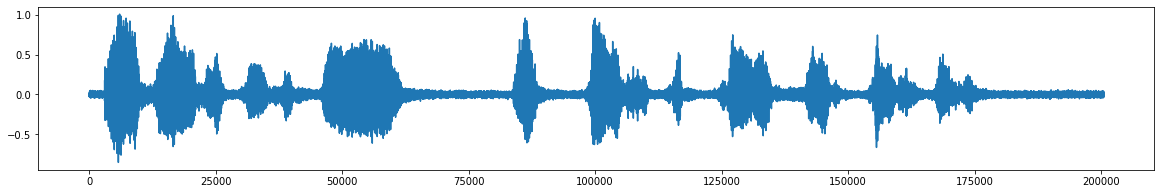

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

# Noise Reduction

In [6]:
reduced_noise = nr.reduce_noise(y = audio_clip_band_limited, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

# Omit Denoised Audio

IPython.display.Audio(data=reduced_noise, rate=rate)